<a href="https://colab.research.google.com/github/NadilaAmaliaaa/PCVK_GANJIL_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama: Nadila Amalia Pribadi
## Kelas: TI-3F / 19
## NIM: 2241720114

# Jobsheet 9 PCVK
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 3. Dilasi dengan SED berbentuk cross 3 x 3

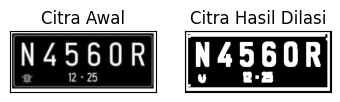

In [3]:
# Dilasi Tanpa Library

def dilasi_citra(F,w):
  #size image
  p,q = F.shape

  imgD = np.zeros((p,q), dtype=np.uint8)

  #generate struktur elemen dilasi
  SED = np.ones((w,w), dtype=np.uint8)
  constant1 = (w-1)//2

  #proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)
  return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

### 4. Dilasi dengan SED berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


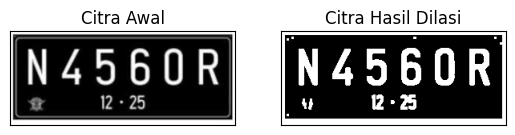

In [4]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)

ret, tresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv2.dilate(tresh, kernel, iterations=1)
print(kernel)

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi, cmap = 'gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

### 5. Erosi dengan Structuring Element Erosi (SE) berbentuk square 5 x 5

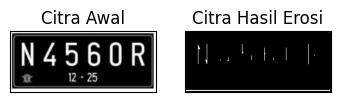

In [6]:
# Erosi tanpa library

def erosi_citra(F, k):
  m,n = F.shape
  imgE = np.zeros((m,n), dtype=np.uint8)

  #generate SE
  SE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  #proses erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SE
      imgE[i,j] = np.min(product)
  return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

### 6. Erosi dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan library

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


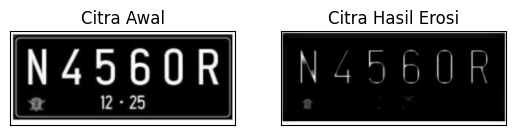

In [7]:
# Erosi Library

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)

kernel = np.ones((5,5),np.uint8)
erosi= cv2.erode(img,kernel,iterations=1)
print(kernel)

plt.subplot(121),plt.imshow(img ,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosi, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

### 7. Opening dengan Structuring Element berbentuk square 3 x 3

#### Opening Tanpa Library

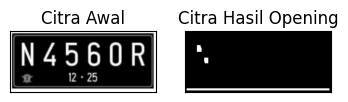

In [8]:
img_o = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

#### Opening Dengan Library

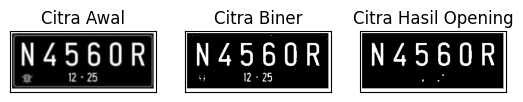

In [9]:
img_o2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

### 8. Closing dengan Structuring Element berbentuk square 3 x 3

#### Closing Tanpa Library

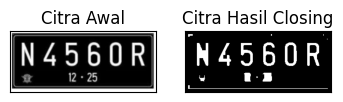

In [10]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
retc,threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

#### Closing Dengan Library

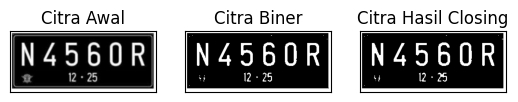

In [11]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

### 9. Dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

SED = Cross 3


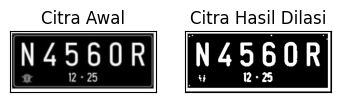

SED = Cross 5


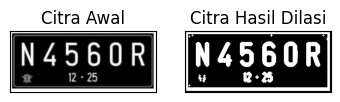

In [12]:
# CROSS 3x3
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# CROSS 5x5
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

### 10. Dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

SED = Circle 3


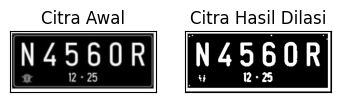

SED = Circle 5


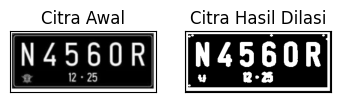

In [13]:
### CIRCULAR 3x3
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

### CIRCULAR 5x5
print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

### 11. Erosi dengan Structuring Element berbentuk rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


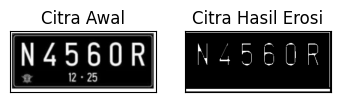

SE = Rectangle 5x7


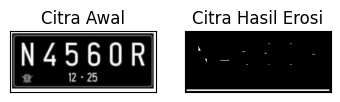

In [14]:
# RECTANGLE 3x5
def erosi_citra(F,p,l):
#size image
  m,n= F.shape
#Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
# print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
#Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# RECTANGLE 5x7
print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

### 12. Erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

SE = Line Vertikal 3


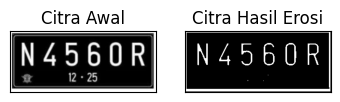

SE = Line Vertikal 5


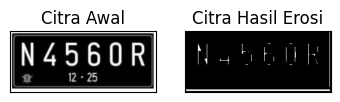

In [15]:
# LINE VERTIKAL = 3
def erosi_citra(F,k):
#size image
  m,n= F.shape
#Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
#Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

# LINE VERTIKAL = 5
print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

### 13. TopHat

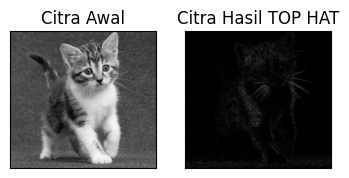

In [16]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

### 14. BlackHat

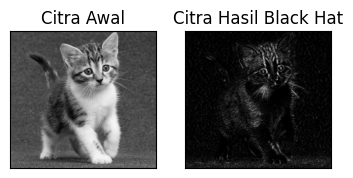

In [17]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

### 15. Skeleton

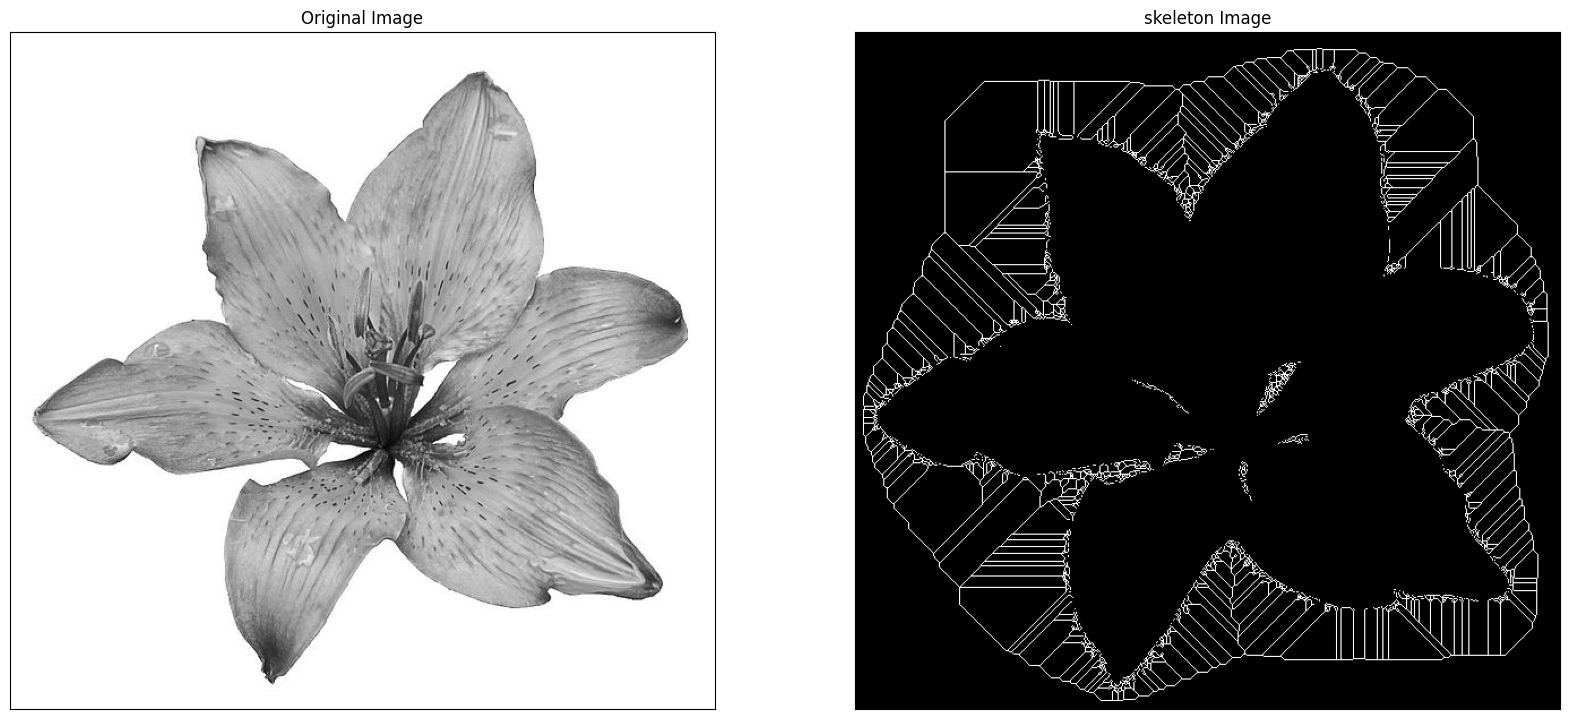

In [18]:
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

### 16. Skeleton Inverse

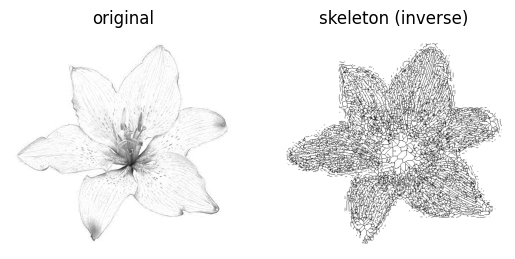

In [19]:
from skimage import io
from skimage import filters
from skimage.morphology import skeletonize

img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[..., 0]

binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()


### 17. Thickening

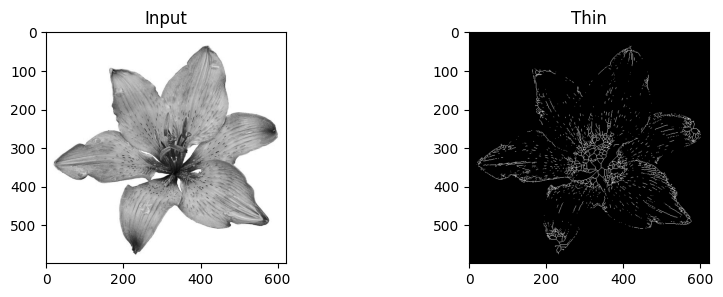

In [20]:
from skimage import img_as_float
from skimage import io, color, morphology

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

## Tugas Praktikum

### Erosi

SE = Rectangle 1x3


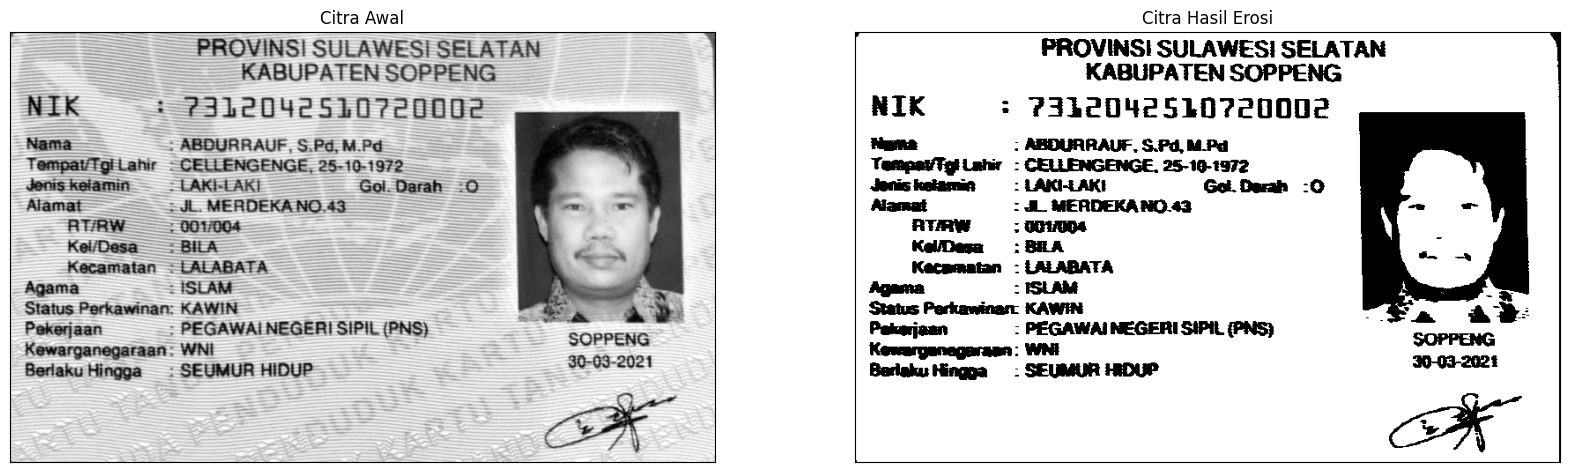

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Erosion function
def erosi_citra(F, p, l):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))
    constant1 = (l-1)//2
    constant2 = (p-1)//2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m-constant1):
        for j in range(constant2, n-constant2):
            temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
            product = temp * SE
            imgE[i, j] = np.min(product)
    return imgE

# Load image and apply binary threshold
print('SE = Rectangle 1x3')
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)

# Erosion parameters
p = 3
l = 1
imgE = erosi_citra(thresh1, p, l)

# Plot original and eroded images side by side
plt.figure(figsize=(20, 16))

# Original image
plt.subplot(121)
plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

# Eroded image
plt.subplot(122)
plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

### Dilasi

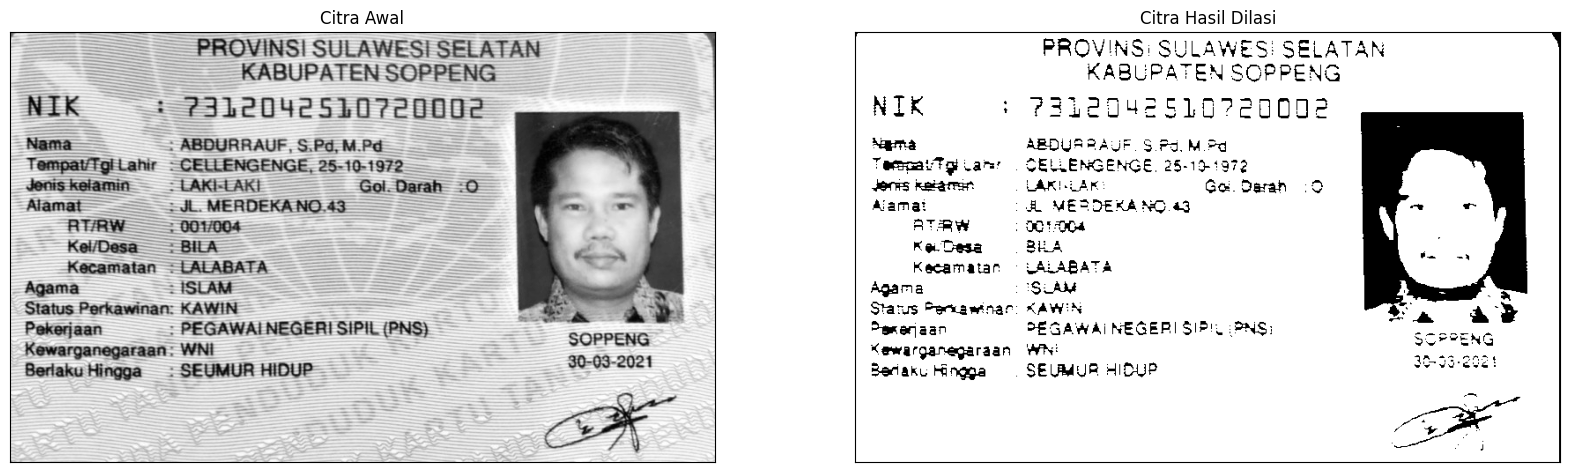

In [45]:
# Dilation function
def dilasi_citra(F, p, l):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))
    constant1 = (l-1)//2
    constant2 = (p-1)//2
    imgD = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m-constant1):
        for j in range(constant2, n-constant2):
            temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
            product = temp * SE
            imgD[i, j] = np.max(product)
    return imgD

# Read the image and apply binary threshold
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg', 0)
ret1, thresh1 = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

# Dilation parameters
p = 3
l = 1

# Apply dilation
imgE = dilasi_citra(thresh1, p, l)

# Plotting
plt.figure(figsize=(20, 16))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

# Dilated image
plt.subplot(122)
plt.imshow(imgE, cmap='gray')  # Change here to display dilated image
plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])

plt.show()

### Opening dan Closing

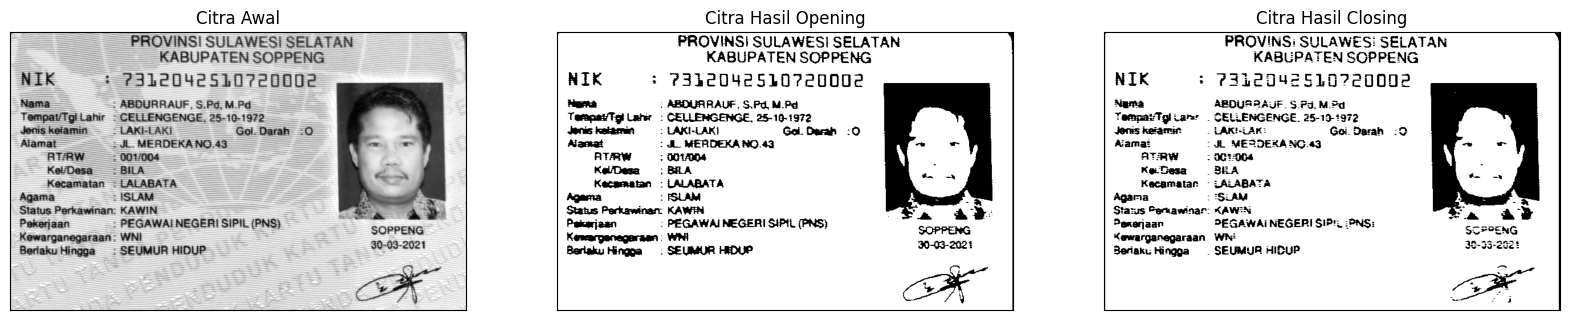

In [41]:
# Morphological Opening: Erosion followed by Dilation
def opening_citra(F, p, l):
    eroded = erosi_citra(F, p, l)
    opened = dilasi_citra(eroded, p, l)
    return opened

# Morphological Closing: Dilation followed by Erosion
def closing_citra(F, p, l):
    dilated = dilasi_citra(F, p, l)
    closed = erosi_citra(dilated, p, l)
    return closed

# Read image and binarize it
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)

p, l = 3, 1  # Structuring element size

# Apply Opening and Closing
img_opening = opening_citra(thresh1, p, l)
img_closing = closing_citra(thresh1, p, l)

# Plot results
plt.figure(figsize=(20, 16))

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

### Top-Hat dan Black-Hat

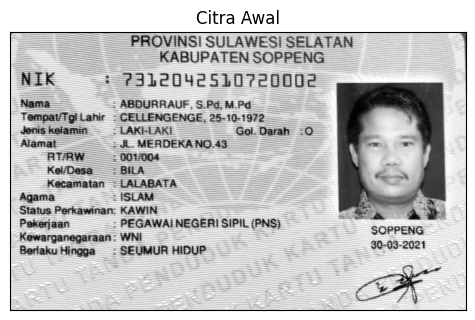

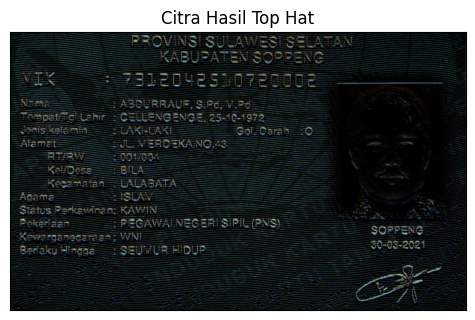

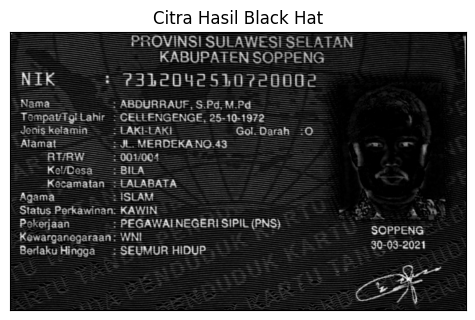

In [47]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
input_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat_img = cv2.morphologyEx(input_image2, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(input_image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil Top Hat'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(blackhat_img,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()